In [192]:
import pandas as pd

In [193]:
import numpy as np

In [194]:
import matplotlib.pyplot as plt

In [195]:
%matplotlib inline

In [196]:
import seaborn as sns

In [197]:
data=pd.read_csv("/home/user/Desktop/bhk/model/home_prices.csv")

In [198]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [199]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [200]:
data.availability.unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [201]:
data['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [202]:
data.shape

(13320, 9)

In [203]:
data.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [204]:
data1=data.drop(['area_type','availability','society','balcony'],axis=1)

In [205]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [206]:
data1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [207]:
data1.dropna(inplace=True)

In [208]:
data1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [209]:
data1.shape

(13246, 5)

In [210]:
data1.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [211]:
data1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [212]:
data1['bhk']=data1['size'].apply(lambda x:x.split(" ")[0])

In [213]:
data1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [214]:
data1['bhk'].unique()

array(['2', '4', '3', '6', '1', '8', '7', '5', '11', '9', '27', '10',
       '19', '16', '43', '14', '12', '13', '18'], dtype=object)

In [215]:
data1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [216]:
def fun(x):
    try:
        float(x)
    except:
        return False
    return True

In [217]:
data1[data1['total_sqft'].apply(fun)].head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [218]:
def func(x):
    tokens=x.split("-")
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [219]:
data1['total_sqft']=data1['total_sqft'].apply(func)

In [220]:
data1.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [221]:
data1['price_per_sqft']=data1['price']*100000/data1['total_sqft']

In [222]:
data1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [223]:
len(data1['location'].unique())

1304

In [224]:
data1.location=data1.location.apply(lambda x:x.strip())

In [225]:
location_stats=data1.groupby('location')['location'].agg('count')

In [226]:
location_stats

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [227]:
stats_less_than_10=(location_stats[location_stats<=10])

In [228]:
stats_less_than_10

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1052, dtype: int64

In [229]:
len(data.location.unique())

1306

In [230]:
data1.location=data1.location.apply(lambda x: 'other' if x in stats_less_than_10 else x)
len(data1.location.unique())

242

In [231]:
data1.bhk=data1.bhk.astype('int')

In [232]:
data1[(data1.total_sqft)/data1.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [233]:
data1.shape

(13246, 7)

In [234]:
data2=data1[~(data1.total_sqft/data1.bhk<300)]

In [235]:
data2.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [236]:
data2.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x7772285160e0>,
 'caps': [<matplotlib.lines.Line2D at 0x777228516680>,
 'boxes': [<matplotlib.lines.Line2D at 0x777228515de0>],
 'medians': [<matplotlib.lines.Line2D at 0x777228516c20>],
 'fliers': [<matplotlib.lines.Line2D at 0x777228516ef0>],
 'means': []}

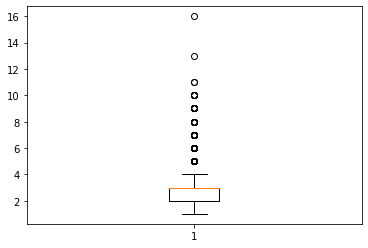

In [239]:
plt.boxplot(data2.bhk)

{'whiskers': [<matplotlib.lines.Line2D at 0x777228598f70>,
 'caps': [<matplotlib.lines.Line2D at 0x777228599510>,
 'boxes': [<matplotlib.lines.Line2D at 0x777228598c40>],
 'medians': [<matplotlib.lines.Line2D at 0x777228599ab0>],
 'fliers': [<matplotlib.lines.Line2D at 0x777228599d80>],
 'means': []}

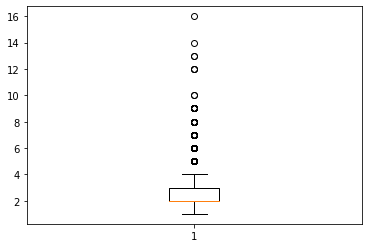

In [240]:
plt.boxplot(data2.bath)

In [243]:
def remove_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [244]:
data3=remove_outliers(data2)

In [245]:
data3.shape

(10241, 7)

In [246]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [247]:
data3['bhk']=list(data3['bhk'])

In [248]:
data4=remove_bhk_outliers(data3)
data4.shape

(7329, 7)

Text(0, 0.5, 'count')

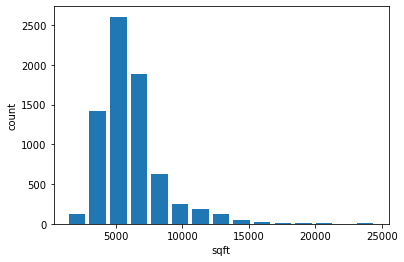

In [249]:
plt.hist(data4.price_per_sqft,rwidth=0.8,bins=15)
plt.xlabel("sqft")
plt.ylabel("count")

In [250]:
data4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [251]:
data4[data4['bath']>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

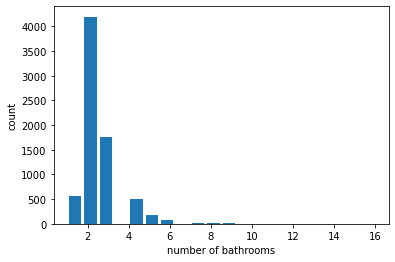

In [252]:
plt.hist(data4.bath,bins=20,rwidth=0.8)
plt.xlabel("number of bathrooms")
plt.ylabel("count")

In [253]:
data4[data4.bath>data4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [254]:
data5=data4[data4.bath<data4.bhk+2]

In [255]:
data5.shape

(7251, 7)

In [256]:
data6=data5.drop(['size','price_per_sqft'],axis='columns')

In [257]:
data6.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [258]:
d1=pd.get_dummies(data6.location,dtype=int)

In [259]:
d1.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [260]:
data7=pd.concat([data6,d1],axis=1)

In [261]:
data7.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
data7.shape

(7251, 247)

In [263]:
data7.columns=data7.columns.str.lower()

In [264]:
data8=data7.drop('location',axis=1)

In [265]:
data8.shape

(7251, 246)

In [266]:
data8.head()

,total_sqft,bath,price,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,...,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur,other
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
data8.columns=data8.columns.str.lower()

{'whiskers': [<matplotlib.lines.Line2D at 0x777228365f30>,
 'caps': [<matplotlib.lines.Line2D at 0x7772283664d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x777228365c60>],
 'medians': [<matplotlib.lines.Line2D at 0x777228366a70>],
 'fliers': [<matplotlib.lines.Line2D at 0x777228366d40>],
 'means': []}

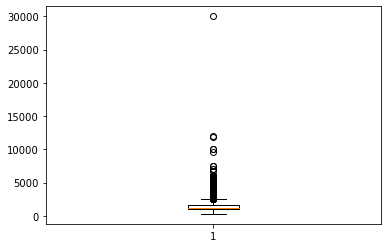

In [311]:
plt.boxplot(data8['total_sqft'])

{'whiskers': [<matplotlib.lines.Line2D at 0x777224867c40>,
 'caps': [<matplotlib.lines.Line2D at 0x777224894220>,
 'boxes': [<matplotlib.lines.Line2D at 0x777224867970>],
 'medians': [<matplotlib.lines.Line2D at 0x7772248947c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x777224894a90>],
 'means': []}

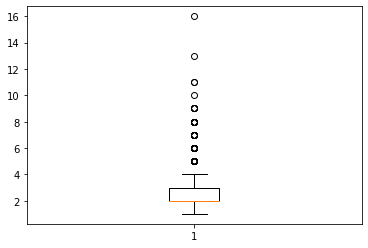

In [312]:
plt.boxplot(data8.bhk)

In [268]:
x=data8.drop('price',axis="columns")

In [269]:
y=data8.price

In [270]:
x.head(3)

,total_sqft,bath,bhk,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur,other
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [272]:
from sklearn.model_selection import train_test_split

In [273]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [274]:
len(x_train)

5438

In [275]:
len(x_test)

1813

In [317]:
x_train_log=np.log(x_train)

/home/user/.local/lib/python3.10/site-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [318]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [319]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor

In [320]:
models={
    "LinearRegression":LinearRegression(),
    "RidgeRegression":Ridge(),
    "LassoRegression":Lasso(),
    "ElasticNet":ElasticNet(),
    "BayesianRidge":BayesianRidge(),
    "SGDRegressor":SGDRegressor(),
    "Xgboosting":XGBRegressor()
}

In [324]:
models_list=[]
accuracy=[]

for i in range(len(models)):
    model=list(models.values())[i]
    #train model
    model.fit(x_train,y_train)
    
    #predictions
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)
    
    #get the accuracy score for train and test dataset
    train_accuracy=model.score(x_train,y_train)
    test_accuracy=model.score(x_test,y_test)
    #print the model and the accuracy scores 
    
    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])
    
    #Train dataset score
    print("Training data score",train_accuracy)
    
    #Test dataset score
    print("Test data scores",test_accuracy)

    
    accuracy.append(test_accuracy)
    
    print('='*50)
    print("\n")

LinearRegression
Training data score 0.8535287054963554
Test data scores 0.8193975609639867


RidgeRegression
Training data score 0.8514140275418652
Test data scores 0.819929323786396


LassoRegression
Training data score 0.7211524100699349
Test data scores 0.6776799245389737


ElasticNet
Training data score 0.7133749437750028
Test data scores 0.6806539722425979


BayesianRidge
Training data score 0.8528975101663695
Test data scores 0.8207031737096301


SGDRegressor
Training data score -5.59736274016422e+25
Test data scores -5.56160443664659e+25


Xgboosting
Training data score 0.9498876909024364
Test data scores 0.9181384534969421




In [325]:
pd.DataFrame(list(zip(models_list, accuracy)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy
6,Xgboosting,9.181385e-01
4,BayesianRidge,8.207032e-01
1,RidgeRegression,8.199293e-01
0,LinearRegression,8.193976e-01
3,ElasticNet,6.806540e-01
2,LassoRegression,6.776799e-01
5,SGDRegressor,-5.561604e+25


In [326]:
from sklearn.model_selection import ShuffleSplit 

In [327]:
from sklearn.model_selection import cross_val_score

In [328]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

In [329]:
cross_val_score(LinearRegression(),x_train,y_train,cv=cv)

array([0.84869661, 0.81896998, 0.83669646, 0.84071314, 0.80766603])

In [330]:
from sklearn.compose import ColumnTransformer

In [331]:
from sklearn.preprocessing import StandardScaler

In [332]:
numeric_features = ["total_sqft", "bath", "bhk"]

In [333]:
location_features = [col for col in x.columns if col not in numeric_features]

In [334]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("loc", "passthrough", location_features)   # keep location columns as is
    ]
)

In [335]:
from sklearn.linear_model import BayesianRidge

In [336]:
from sklearn.pipeline import Pipeline

In [337]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor())
])

In [338]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_sqft', 'bath',
                                                   'bhk']),
                                                 ('loc', 'passthrough',
                                                  ['1st block jayanagar',
                                                   '1st phase jp nagar',
                                                   '2nd phase judicial layout',
                                                   '2nd stage nagarbhavi',
                                                   '5th block hbr layout',
                                                   '5th phase jp nagar',
                                                   '6th phase jp nagar',
                                                   '7th phase jp nagar',
                                                   '8th phase jp nagar',
                                                   '9th phase jp nagar',
                                                   'aecs layout', 'abb...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [339]:
y_pred_log=model.predict(x_test)

In [340]:
y_pred=np.exp(y_pred_log)

/tmp/ipykernel_50578/1796322365.py:1: RuntimeWarning: overflow encountered in exp
  y_pred=np.exp(y_pred_log)


In [341]:
model.score(x_test,y_test)

0.9181384534969421

In [342]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,root_mean_squared_error

In [348]:
mae=mean_absolute_error(y_test,y_pred_log)

In [349]:
mae

14.576541108175068

In [350]:
mse=mean_squared_error(y_test,y_pred_log)

In [351]:
mse

718.3857534206995

In [353]:
r2=r2_score(y_test,y_pred_log)

In [354]:
r2

0.9181384534969421

In [356]:
rmse=root_mean_squared_error(y_test,y_pred_log)

In [357]:
rmse

26.80271914229412

In [358]:
import joblib

In [370]:
joblib.dump(model,'/home/user/Desktop/bhk/model/house_price.pkl')

['/home/user/Desktop/bhk/model/house_price.pkl']

In [371]:
model = joblib.load("/home/user/Desktop/bhk/model/house_price.pkl")

In [372]:
data8.to_csv("/home/user/Desktop/bhk/model/final_dataset.csv", index=False)